# Compare different decision functions

In this study we want to compare, for a fixed model architecture on the "OvA" problem, the influence of the decision function on the model's performances.

The evaluation is performed on the test set, using the AU-ROC metrics to compare each performance

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.random import normal
import tensorflow.keras as keras

from tensorflow.keras import Model, layers
from tensorflow.keras.datasets import mnist

print(tf.__version__)

from uad.callbacks.classification import AUCCallback
from uad.MNIST.draw_line import set_anomaly, predict_anomalies, contour_anomalies, plot_anomalies
from uad.metrics.AU_ROC import compute_ROC, compute_AUC, plot_ROC
from uad.MNIST.one_vs_all import plot_prediction, plot_per_digit_proportion
from uad.decision.reconstruction import is_anormal, decision_function, binarize_set

# !nvidia-smi

2.2.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_test = np.expand_dims(x_test, -1).astype("float32") / 255

x_val, y_val = x_train[-1000:], binarize_set(y_train[-1000:], interest=0)
y_test0 = binarize_set(y_test)

# train set sorted by digits: digits_train[i] = x_train elements where y_train == i
digits_train = np.array([x_train[np.where(y_train[:-1000] == i)] for i in range(10)])

# training set contains only zeros (for training on zeros)
x_train0, y_train0 = digits_train[0][:-1000], y_train[np.where(y_train[:-1000] == 0)][:-1000]

print(x_train0.shape, y_train0.shape, x_val.shape, y_val.shape)
print(y_test[:5], y_test0[:5])

(4825, 28, 28, 1) (4825,) (1000, 28, 28, 1) (1000,)
[7 2 1 0 4] [1 1 1 0 1]


In [3]:
vae = tf.keras.models.load_model("saved_models/vae_4x4x16_trained_0")

In [4]:
vae_predictions = vae.predict(x_test)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x257ec937508>)

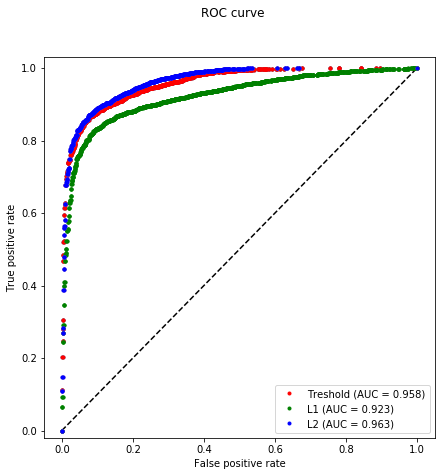

In [5]:
fpr_thresh, tpr_thresh, _ = compute_ROC(x_test, vae_predictions, y_test0, criterion="threshold", pix_threshold=0.7)
fpr_l1, tpr_l1, _ = compute_ROC(x_test, vae_predictions, y_test0, criterion="l1", pix_threshold=0.7)
fpr_l2, tpr_l2, _ = compute_ROC(x_test, vae_predictions, y_test0, criterion="l2", pix_threshold=0.7)

plot_ROC(np.array([fpr_thresh, fpr_l1, fpr_l2]), np.array([tpr_thresh, tpr_l1, tpr_l2]), labels=np.array(["Treshold", "L1", "L2"]))